<a href="https://colab.research.google.com/github/Hamza1122/Loan_Compaign_Prediction/blob/main/Personal_Loan_Campaign_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context:

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

# Objective:

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more

# Dataset
The data contains information of a customer bank loan.

* The ID variable can be ignored as it will not any effect on our model. As we know customer Id is just to maitain the record in serial order. There is no relationship with Id and Loan.

* Target Variable is Personal Loan which describe whether the person has taken loan or not. This is the variable which we need to predict.

**Nonimal Varibles :**

* ID - Customer ID

* ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.

**Ordinal Categorical variables :**

* Family - Number of famlily member of the customer
Education - Education level of the customer. In our dataset it ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectivly.

**Interval Variables :**



* Age - Age of the customer
* Experience - Years of experience of customer has
* Income - Annula Income of the customer which is in dollars
* CCAvg - Avg. spending on credit cards per month which in dollars.
* Mortgage - Value of House Mortgage

**Binary Categorical Variable :**

* CD Account - Does the customer have CD Account with bank or not?
* Security Account - Does the customer have Security Account with bank or not?
* Online - Does the customer have Online banking facility with bank or not?
* Credit Card - Does the customer have a credit card issued by Universal Bank or not?
* Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?

### Import the necessary packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

### **Read the dataset**

In [ ]:
loan_modelling = pd.read_csv('Loan_Modelling.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
data=loan_modelling.copy()

### **View the first and last 10 rows of the dataset.**

In [ ]:
data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
data.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


### **Understand the shape of the dataset.**

In [ ]:
data.shape

(5000, 14)

* Dataset has 12330 rows and 18 columns

### Let's check the duplicate data. And if any, we should remove it.

In [ ]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### As we can see there is no duplicate values

### **Check the data types of the columns for the dataset.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### **Check for missing values**

In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in the data.

**Give a statistical summary for the dataset.**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation:**

* Average annual income of person is around 73$.
* Maximum Age of a person in a bank is 67 years old.
* Maximum experienced of a person in a bank is 43.
* Mostly people has Advanced/Professional Background
* Here we can see that minumum value of Experience  column is -3.0 which could be a mistake because Experience can not be negative. So I will be fixing it in data cleaning and error fixing part.
* Binary varibales 'Personal Loan', 'Credit Card', 'Online', 'CD Account', 'Security Account' has clean data.
* Ordinary Cat variables 'Familty' and 'Education' are also clean.
Target variable also looks fine

In [ ]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

**On the basis of number of unique values we can seperate the continuous and categorical data**



In [ ]:
categorical_variables=[col for col in data.columns if data[col].nunique()<=5]
print(categorical_variables)

continuous_variables=[col for col in data.columns if data[col].nunique()>5]
print(continuous_variables)

['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


**We will remove the Personal Loan from categorical variable list as it is the target variable (Dependent Variable) and ID from the continuous variable list as it doesn't take part in data modeling**

In [ ]:
categorical_variables.remove("Personal_Loan")
print(categorical_variables)
continuous_variables.remove("ID")
print(continuous_variables)

['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']


### **EDA (Data Visualization)**

## Univariate analysis

**Analysing the distribution of particular attributes**

**Continuous variable**

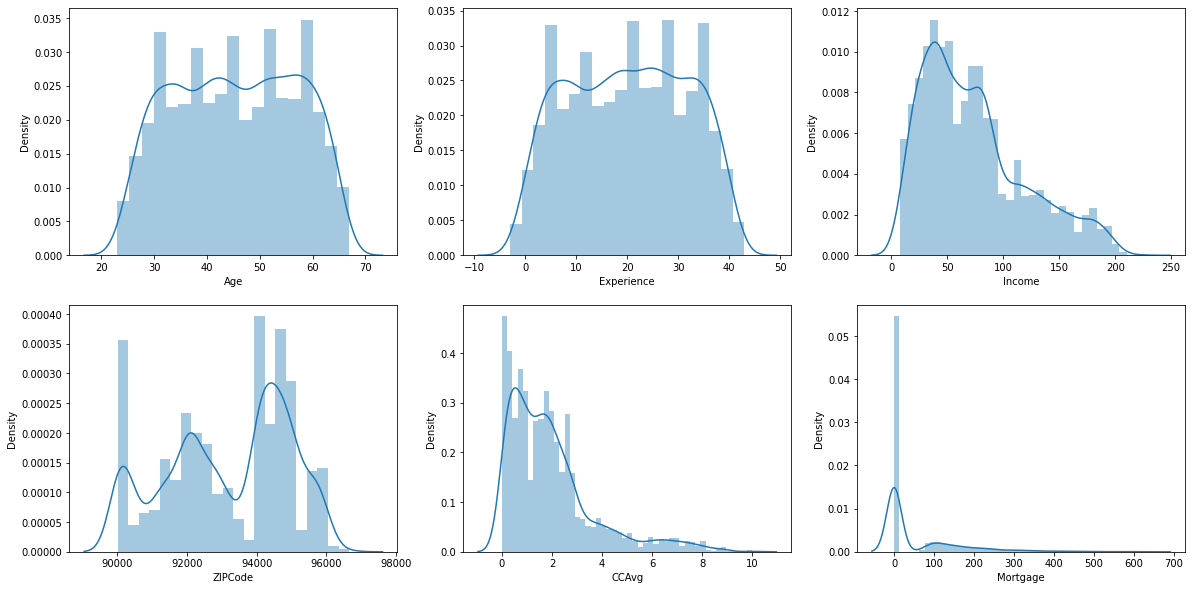

In [ ]:
fig=plt.figure(figsize=(20,10))
#fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(data[col])

1.   We can see that Age and Experience are uniformaly distributed and show a good similarities in distribution.
2. Income, CCAvg, Mortgage are positive Skew
3. ZIP code is negative Skew or it contain values from   single region.
4. Mortgage contain most of the values as 0

**Categorical Variables**

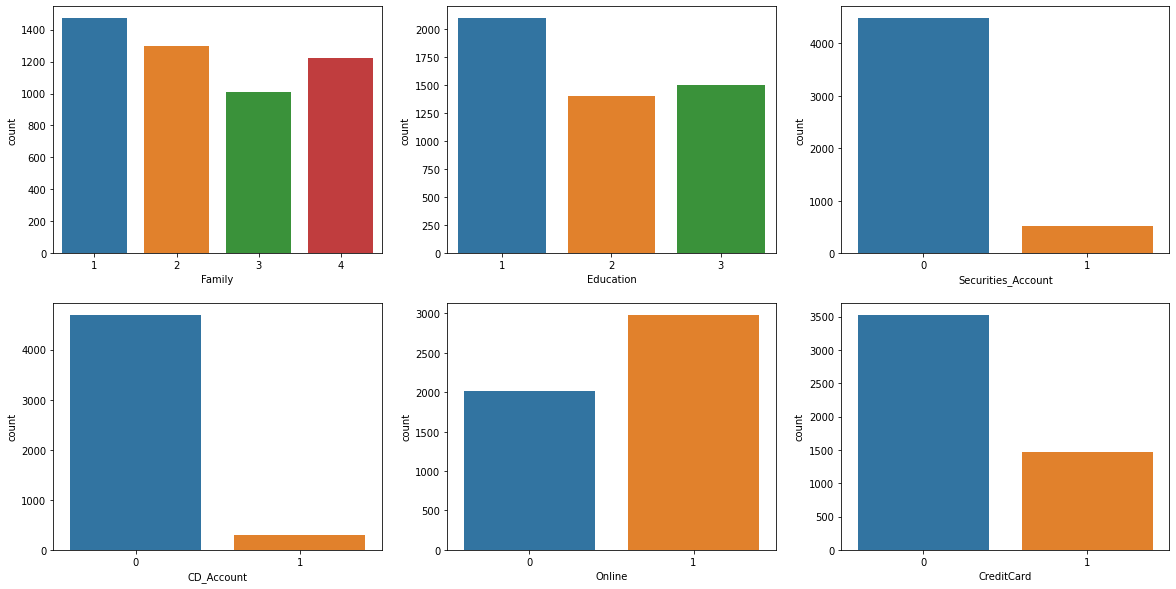

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(data[col])

1. Most of the customer doesn't have Securities Account, CD Account and CreditCard
2. More number of customer use internet banking facilities.
3. More number of customer are Undergrad and have family size one.

# Bivariate Analysis

**Analysing each column (Independent Attribute) first in regard with Personal Loan (Dependent attribute) and then relating them with one another for finding patterns in data**

**Continious Variables**

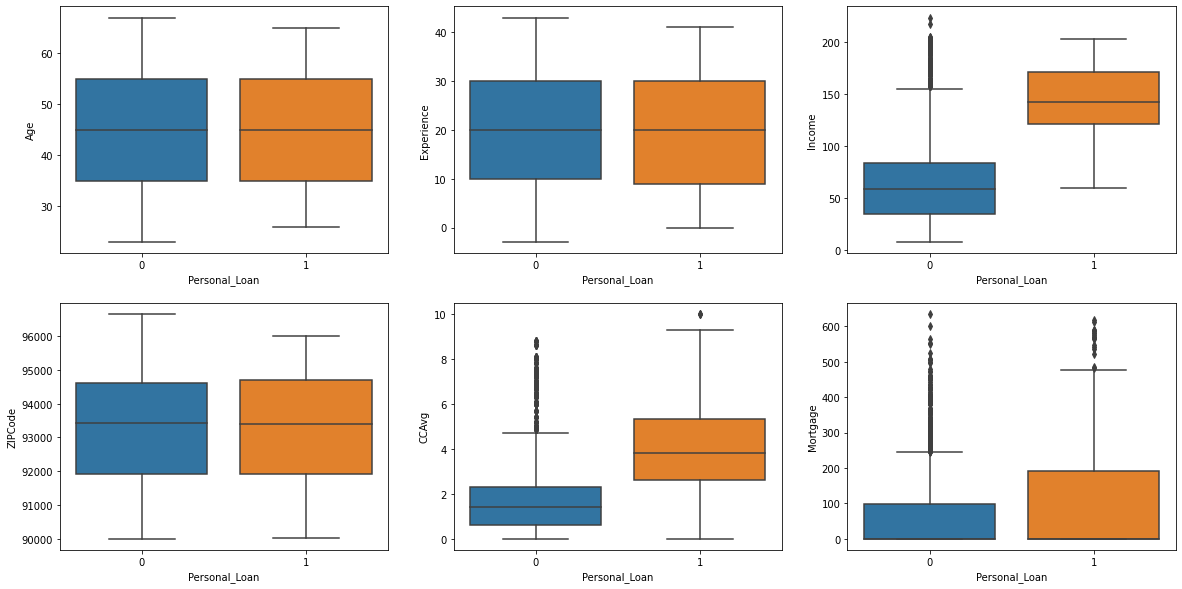

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(y=data[col],x=data['Personal_Loan'])

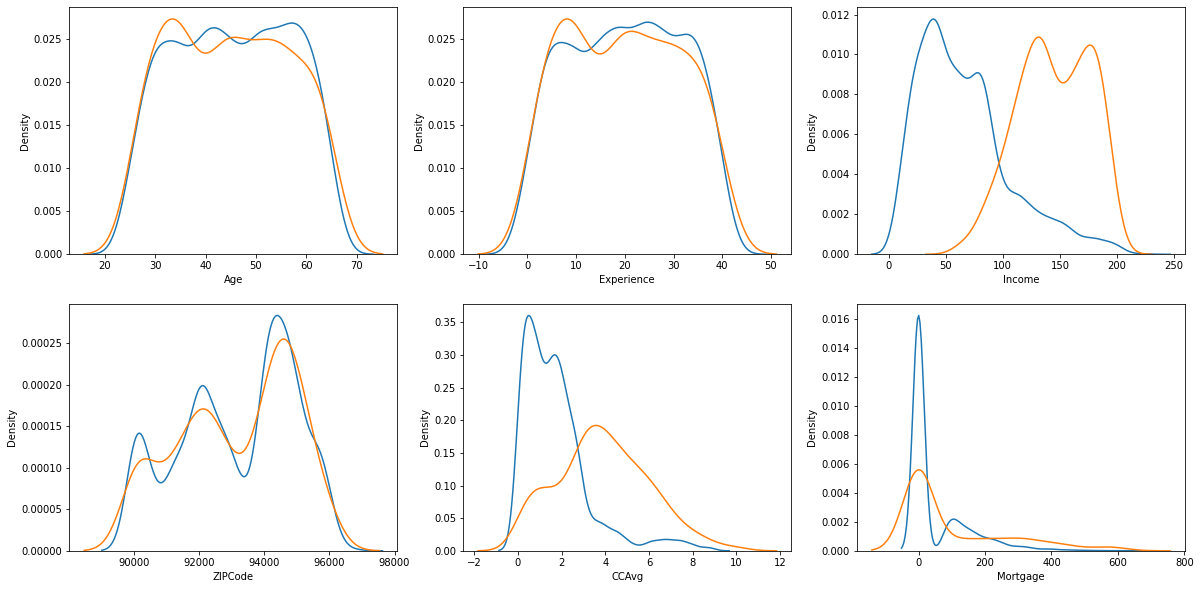

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    ax1=sns.distplot(data[col][data['Personal_Loan']==0],hist=False,label='No Personal Lone')
    sns.distplot(data[col][data['Personal_Loan']==1],hist=False,ax=ax1,label='Personal Lone')

1. Personal Loan doesn't show variations with Age and Experience.
2. Income has a good effect on Personal Loan Customers with High Income have more chances of having Personal Loan.
3. CCAvg also show a good relationship with Personal Loan customers with personal loan have high Avg. spending on credit cards per month
4. Customers want to have high Mortgage have opted for Personal Loan

**Categorical Variable**



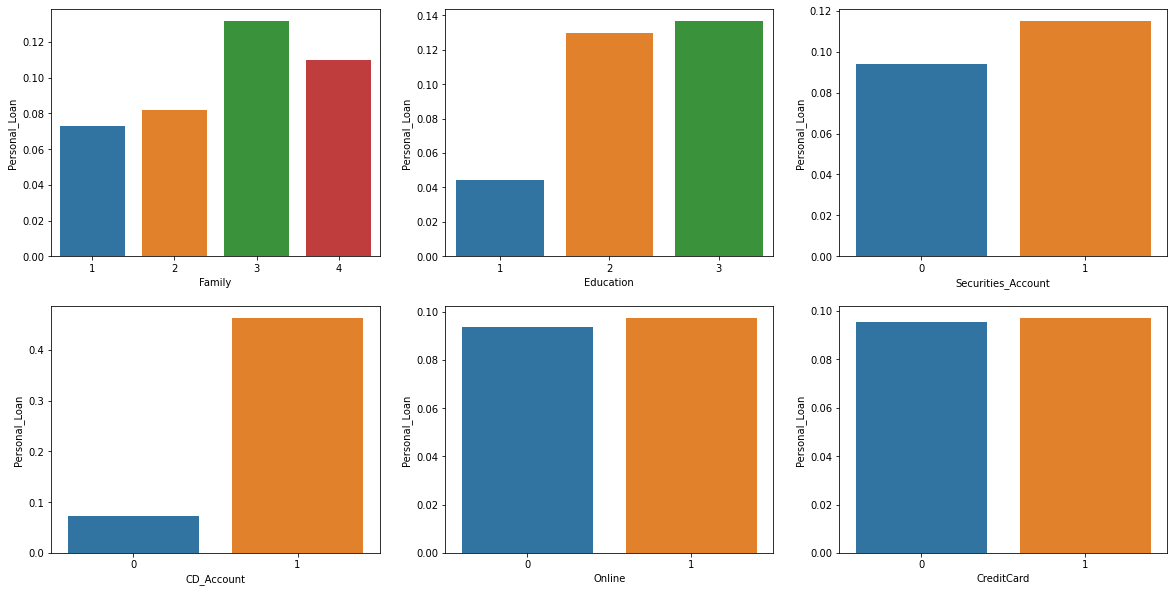

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal_Loan',data=data,ci=None)

1. Customers with family size equal to 3 have more chances of having Personal Loan.
2. Customers with Undergrad degree have less chances of having Personal Loan as compaired to other customers having Graduate or Advanced/Professional degree
3. Customers with CD Account and Securities Account have more chances of having Personal Loan.
4. Customers using online Facitilies or not, having credit card or not doesn't effect much in chances of having Personal Loan

Income is a strong attribute which effect the chances of having Personl Loan High the Income High the chances of having Personal Loan. So we will analysise Income with other attributes

In [ ]:
con=continuous_variables.copy()
con.remove('Income')

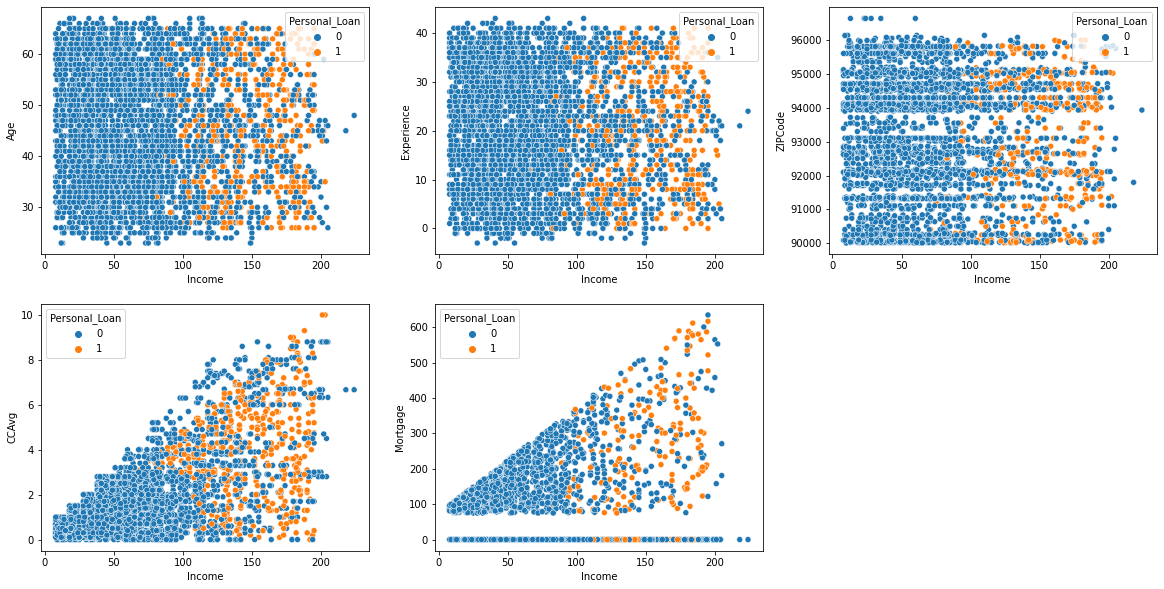

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot('Income',col,hue='Personal_Loan',data=data)

1. Age and Experience have not effect much as customer with high income no matter of what age group have chances of having Personal Loan.
2. ZIP Code shows that all the customers are of particular area and they have no pattern in chances of having personal loan.
3. Customers with high income and having personal loan shows high Avg. spending on credit cards per month and high Value of house mortgage

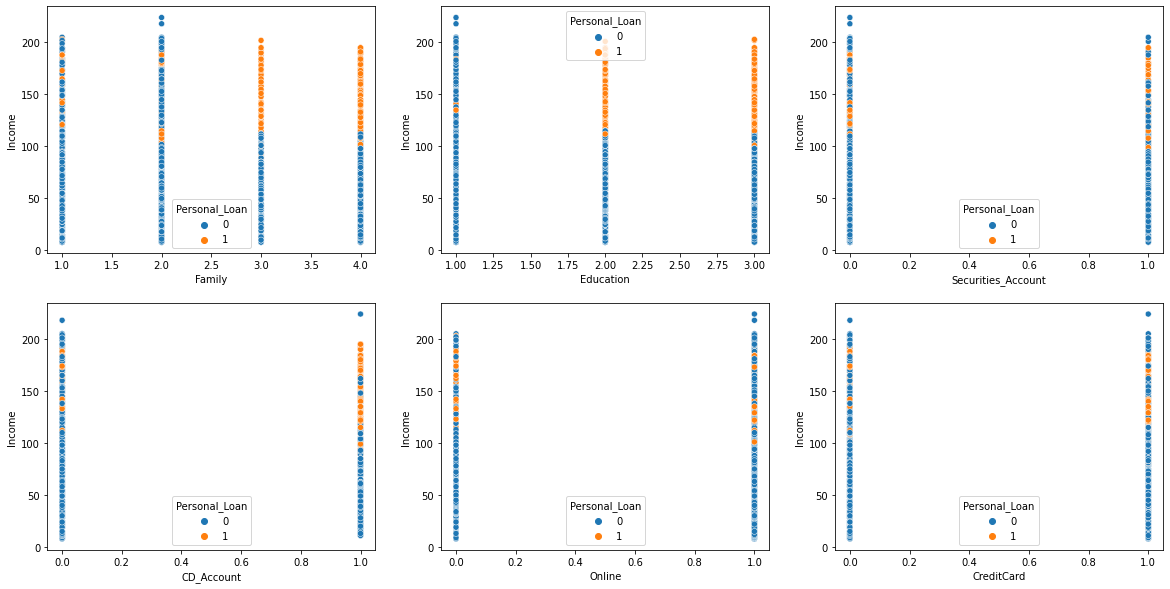

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(col,'Income',hue='Personal_Loan',data=data)

1. Customers with high Degrees and having family size greater then 3 with high income have personal loan.
2. Customers with CD Accounts have chances of having Personal Loan

After income we will find relation of CCAvg with other attributes

In [ ]:
con.remove('CCAvg')

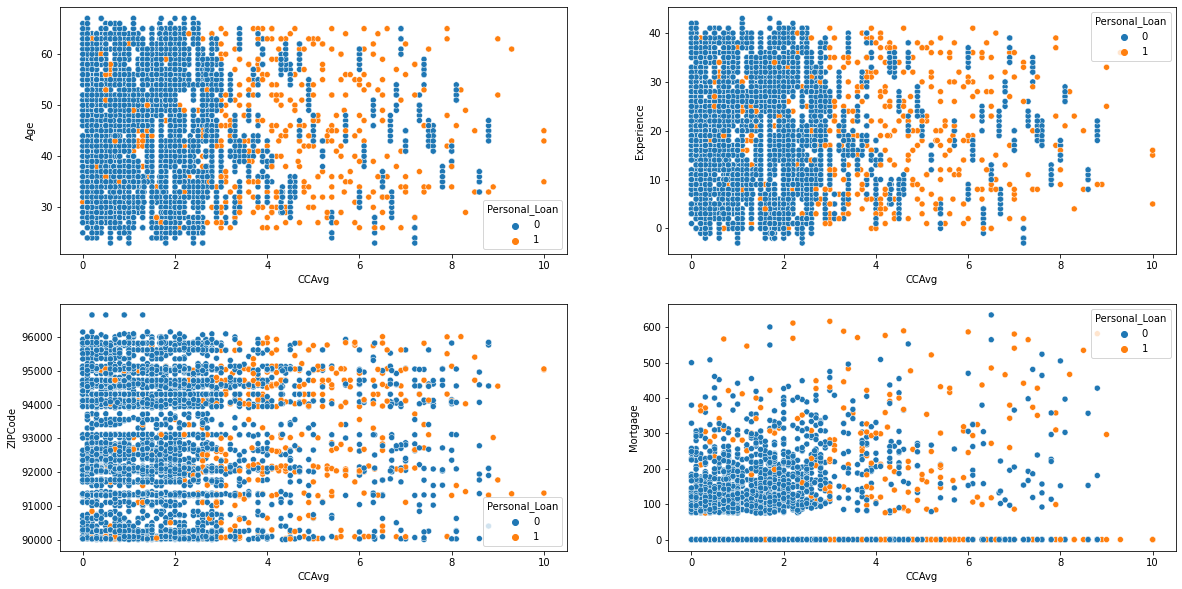

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,2,i+1)
    sns.scatterplot('CCAvg',col,hue='Personal_Loan',data=data)

1. Age and Experience show same patterns on customers with personal loan or not.
2. high CCAvg and Mortgage have more chances of customer having Personal Loan


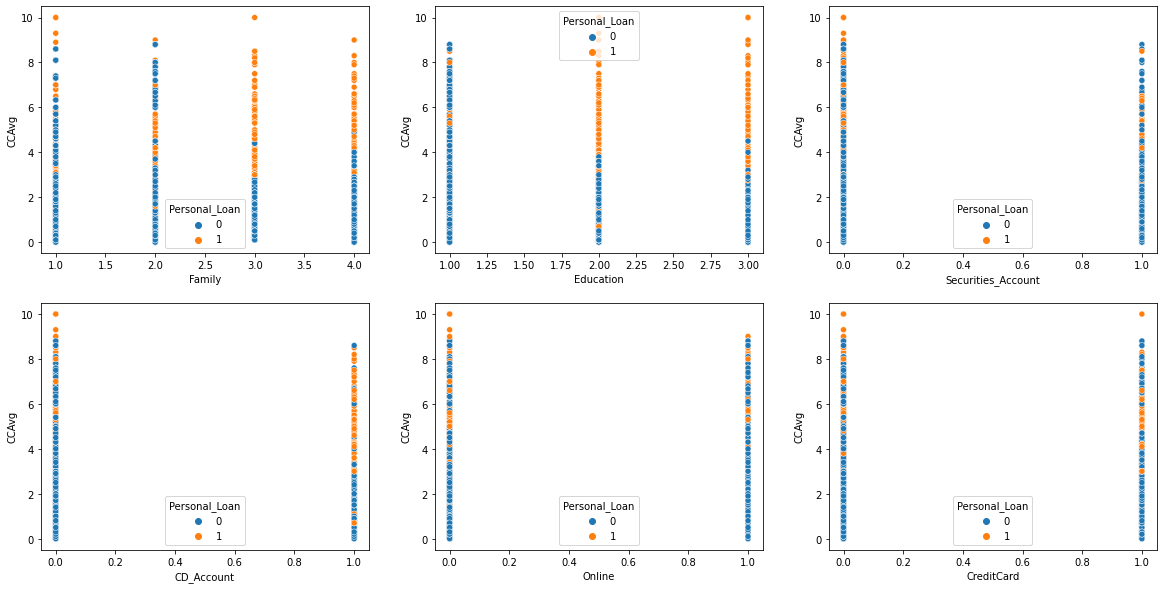

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(col,'CCAvg',hue='Personal_Loan',data=data)

1. CCAvg Shows similar trends as shown by Income

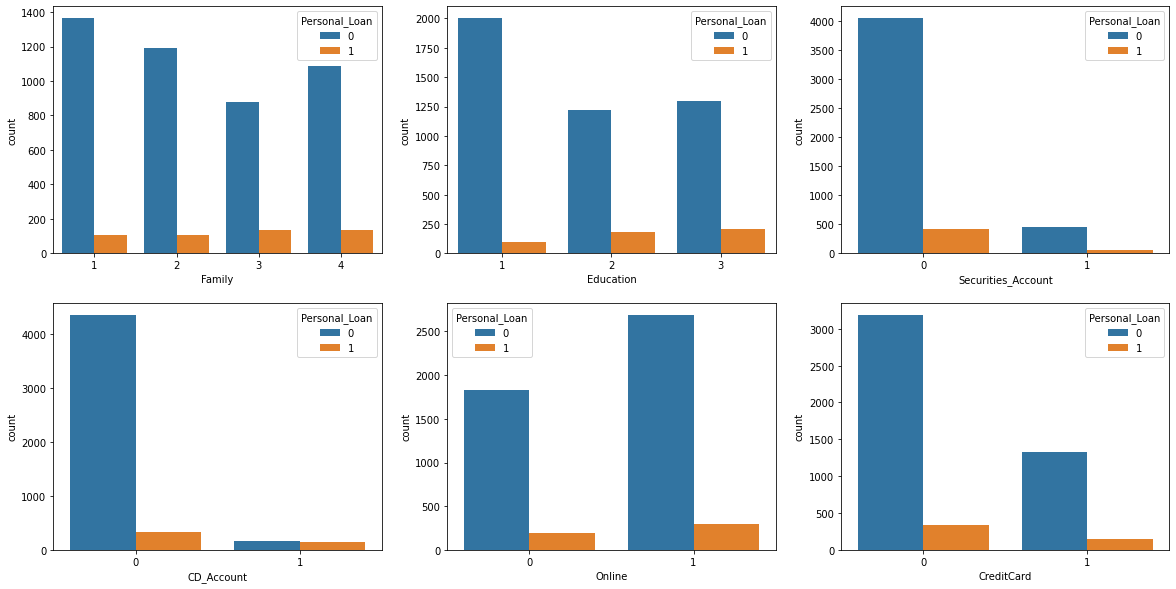

In [ ]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(x=col,hue='Personal_Loan',data=data)

these graph clearly depicts the facts that we had observed previously above like person with CD Account have more chances of having Personal Loan

## **Feature Engineering**

**Data Cleaning**

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(5000, 14)

Since there are no duplicate enteries or row in data so we can set ID as index of datafr

In [ ]:
data.set_index("ID",inplace=True)

Since ZIP Code doesn't show any effect on the chances of Personal Loan it is better to remove it form our data



In [ ]:
data.drop('ZIPCode',axis=1,inplace=True)

Zip code contain data of particular area so it contain minimum variations so we removed it.

Finding relationship between Experience and Age

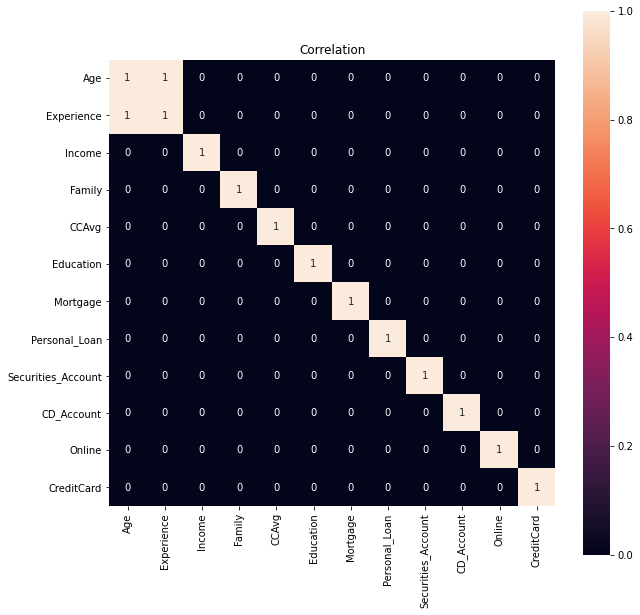

In [ ]:
corr=data.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr > 0.90, annot=True, square=True)

In [ ]:
data[['Age','Experience','Personal_Loan']].corr()

,Age,Experience,Personal_Loan
Age,1.000000,0.994215,-0.007726
Experience,0.994215,1.000000,-0.007413
Personal_Loan,-0.007726,-0.007413,1.000000


since Age shows a little better correlation with Personal loan we will drop the Experience attribute

In [ ]:
data.drop('Experience',axis=1,inplace=True)

**Creating Attributes**

We will try to create a new feature Account contain 1 if any customer is having either CD Account or Security Account or zero if customer have none of them and will try to find its relation with target variable if it shows a better relation compaired to other two then we will keep it otherwise we will remove it

In [ ]:
data['Account']=data['CD_Account']+data['Securities_Account']

In [ ]:
data[['CD_Account','Securities_Account','Account','Personal_Loan']].corr()

,CD_Account,Securities_Account,Account,Personal_Loan
CD_Account,1.000000,0.317034,0.756219,0.316355
Securities_Account,0.317034,1.000000,0.860312,0.021954
Account,0.756219,0.860312,1.000000,0.185185
Personal_Loan,0.316355,0.021954,0.185185,1.000000


Since it shows a week correlation as compaired to CD Account we will drop it

In [ ]:
data.drop('Account',axis=1,inplace=True)

we will now try to create a attribute facilities which will contain 1 if customer uses the bank facilities like online banking or credit card else it will contain 0 and then we will check for relation with the target variable if it is better then the previous one we will keep that attribute

In [ ]:
data['Facilities']=data['Online']+data['CreditCard']

In [ ]:
data[['Facilities','Online','CreditCard','Personal_Loan']].corr()

,Facilities,Online,CreditCard,Personal_Loan
Facilities,1.000000,0.734052,0.682178,0.006493
Online,0.734052,1.000000,0.004210,0.006278
CreditCard,0.682178,0.004210,1.000000,0.002802
Personal_Loan,0.006493,0.006278,0.002802,1.000000


We will keep the Facilities attribute and drop the Online and CreditCard attributes

In [ ]:
data.drop(['Online','CreditCard'],axis=1,inplace=True)

In [ ]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Facilities
ID,,,,,,,,,,
1,25,49,4,1.6,1,0,0,1,0,0
2,45,34,3,1.5,1,0,0,1,0,0
3,39,11,1,1.0,1,0,0,0,0,0
4,35,100,1,2.7,2,0,0,0,0,0
5,35,45,4,1.0,2,0,0,0,0,1


**Applying Scaling**



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaled_df=scaler.fit_transform(data.drop('Personal_Loan',axis=1))

In [ ]:
scaled_df=pd.DataFrame(scaled_df)

In [ ]:
scaled_df.columns=data.drop('Personal_Loan',axis=1).columns
scaled_df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Facilities
0,-1.774417,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.327815
1,-0.029524,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.327815
2,-0.552992,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.327815
3,-0.901970,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.327815
4,-0.901970,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,0.162772


## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

In [ ]:
column_names = list(data.columns)
column_names.remove('Personal_Loan')
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Facilities']


In [ ]:
X=scaled_df
y=data['Personal_Loan']

## Split Data

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 9) (1500, 9)


## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.15, 1: 0.85},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

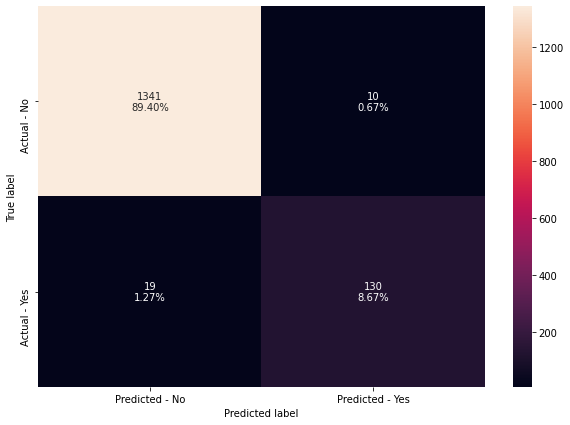

In [ ]:
make_confusion_matrix(model,y_test)

In [ ]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

We only have 9% of positive classes, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

### Insights:

- **True Positives:**
    - Reality: A customer come to a bank visit.
    - Model predicted: The customer will contribute to buying loan.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT come to  a bank visit.
    - Model predicted: The customer will NOT contribute to buying a loan.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT come to a bank visit.
    - Model predicted: The customer will contribute to buying loan.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the buying loan.

- **False Negatives:**
    - Reality: A customer come to a bank visit.
    - Model predicted: The customer will NOT contribute to buying loan.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer come againto bank.

* In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [ ]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.87248322147651


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Visualizing the Decision Tree

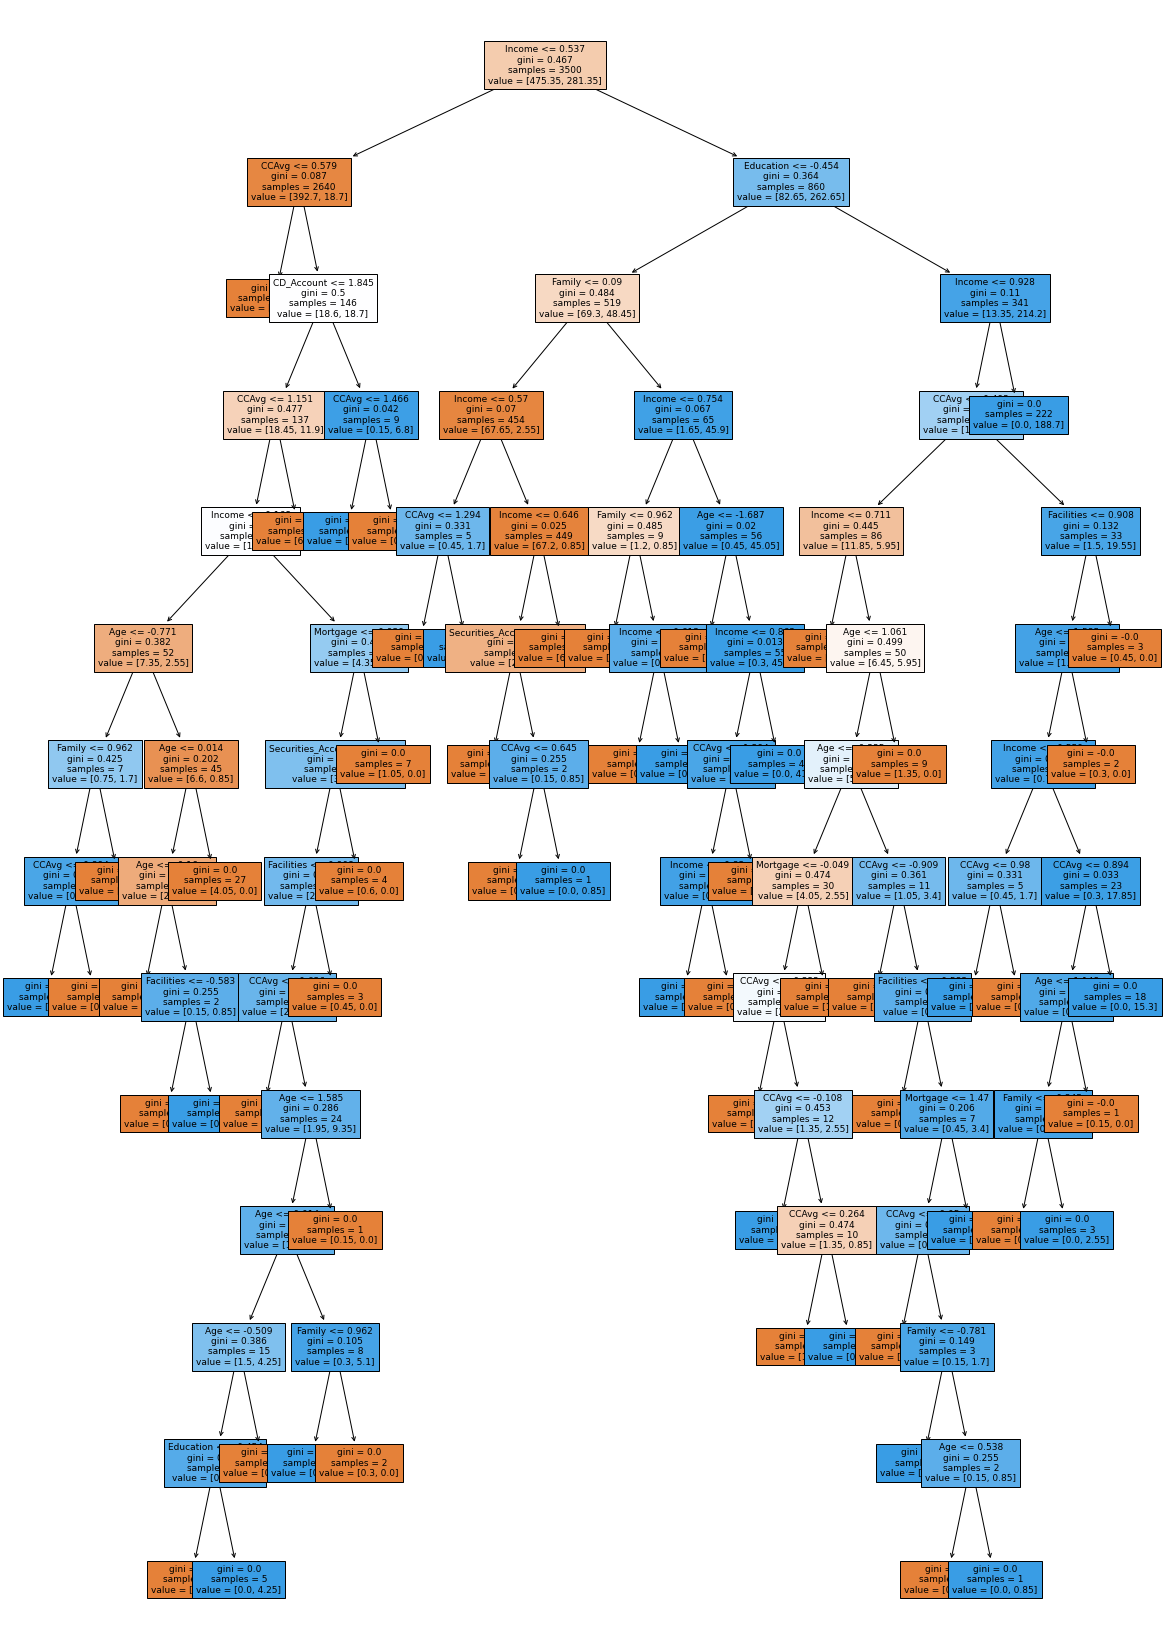

In [ ]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 0.54
|   |--- CCAvg <= 0.58
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  0.58
|   |   |--- CD_Account <= 1.85
|   |   |   |--- CCAvg <= 1.15
|   |   |   |   |--- Income <= 0.17
|   |   |   |   |   |--- Age <= -0.77
|   |   |   |   |   |   |--- Family <= 0.96
|   |   |   |   |   |   |   |--- CCAvg <= 0.89
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  0.89
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  0.96
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  -0.77
|   |   |   |   |   |   |--- Age <= 0.01
|   |   |   |   |   |   |   |--- Age <= -0.16
|   |   |   |   |   |   |   |   |--- weights: [2.40, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  -0.16
|   |   |   |   |   |   |   |   |--- Facilities <= -0.58
|   |   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|

In [ ]:
X_train.shape

(3500, 9)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Income              0.589738
Family              0.145141
Education           0.126239
CCAvg               0.093340
Age                 0.019540
CD_Account          0.011000
Facilities          0.005195
Mortgage            0.005090
Securities_Account  0.004716


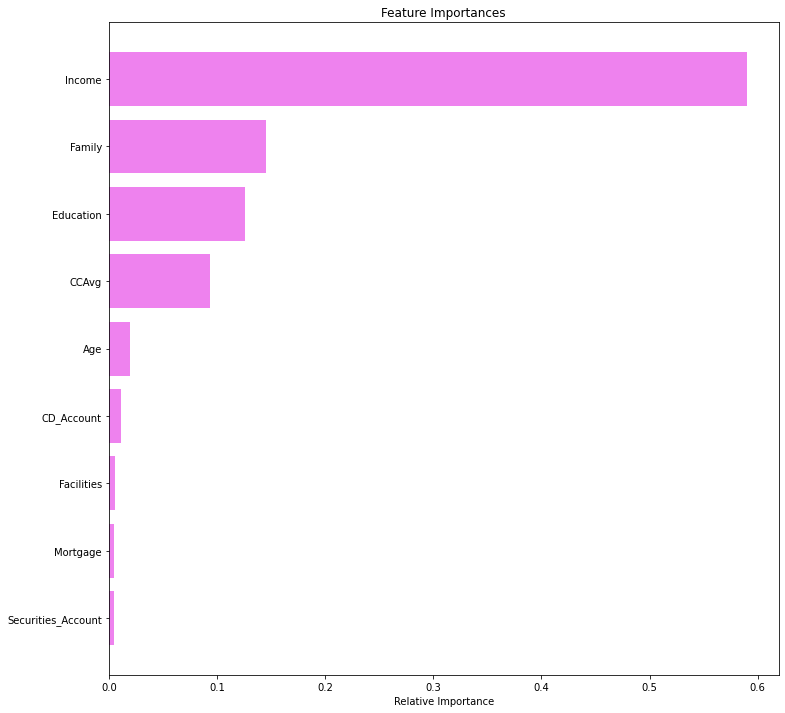

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the buying loan.

**The tree above is very complex and difficult to interpret.**

## Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.15, 1: 0.85},
                       criterion='entropy', max_depth=1, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=1e-06,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

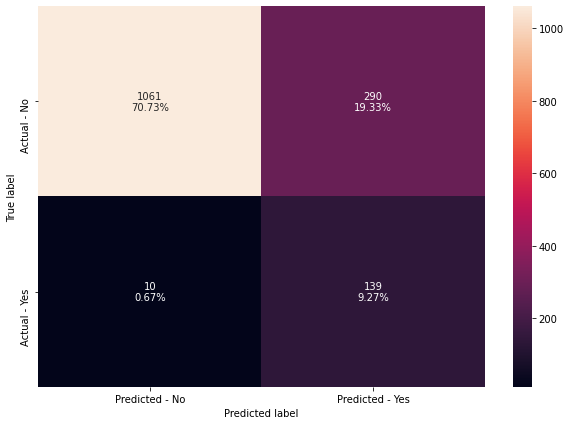

In [ ]:
make_confusion_matrix(estimator,y_test)

In [ ]:
get_recall_score(estimator)

Recall on training set :  0.9546827794561934
Recall on test set :  0.9328859060402684


**Recall has improved for both train and test set after hyperparameter tuning and we have a generalized model.**

## Visualizing the Decision Tree

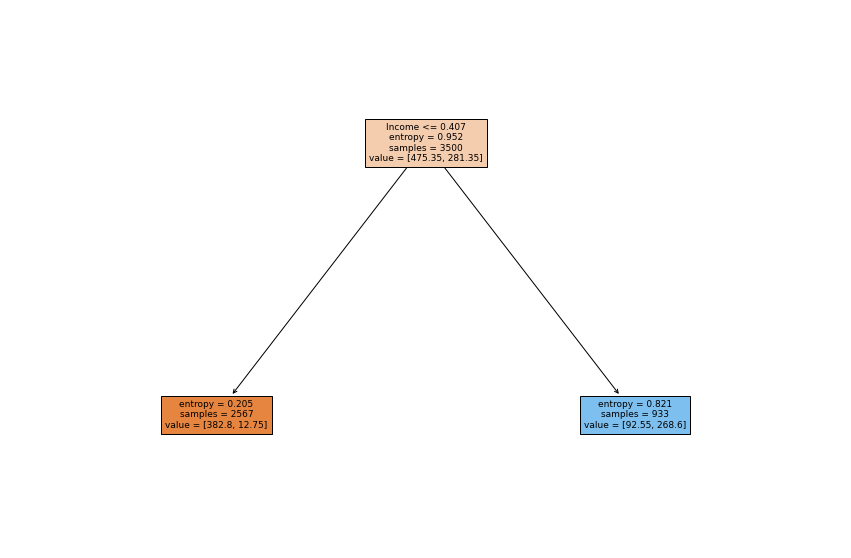

In [ ]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 0.41
|   |--- weights: [382.80, 12.75] class: 0
|--- Income >  0.41
|   |--- weights: [92.55, 268.60] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                    Imp
Income              1.0
Age                 0.0
Family              0.0
CCAvg               0.0
Education           0.0
Mortgage            0.0
Securities_Account  0.0
CD_Account          0.0
Facilities          0.0


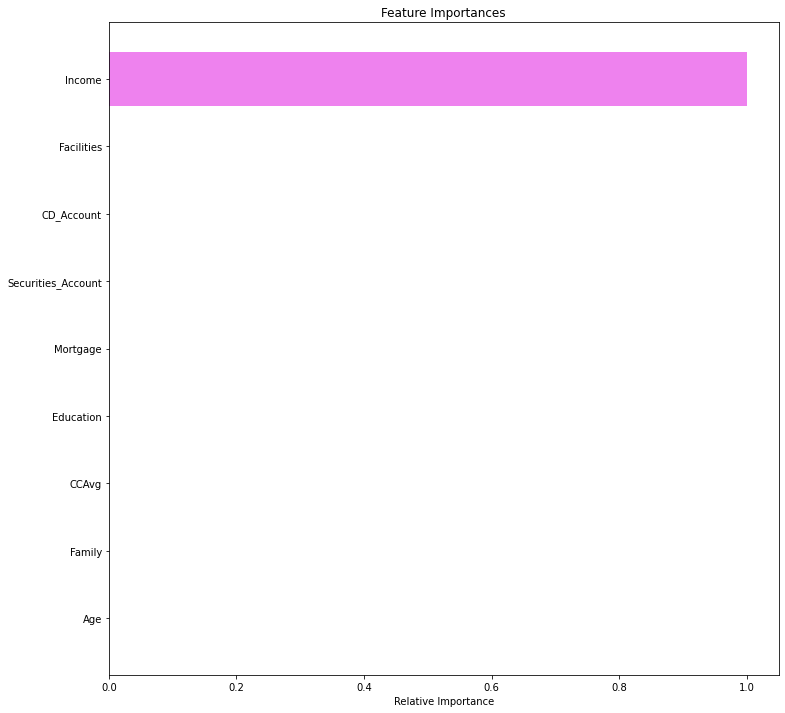

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,-6.385550e-15
1,0.000182,3.643130e-04
2,0.000260,1.144124e-03
3,0.000263,1.931795e-03
4,0.000328,2.915440e-03
5,0.000337,3.252430e-03
6,0.000337,3.589419e-03
7,0.000337,3.926409e-03
8,0.000364,4.290722e-03
9,0.000388,4.678623e-03


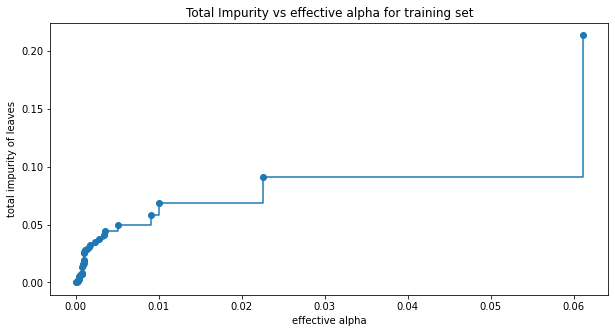

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2537957148948102



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

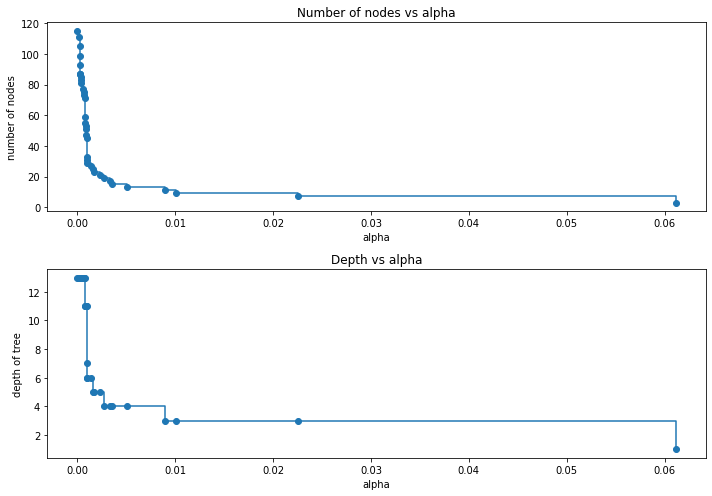

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

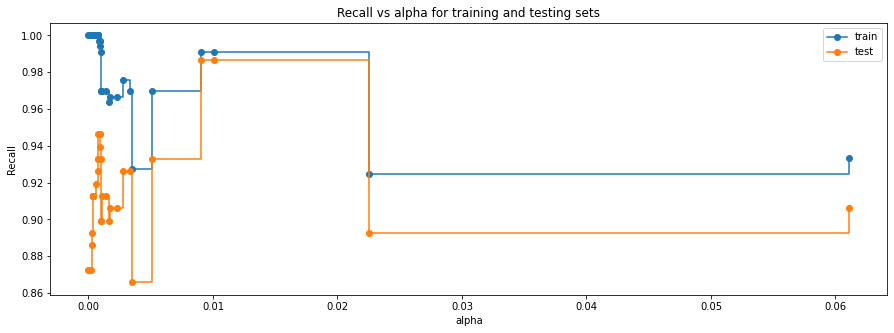

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.014 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002 retaining information and getting higher recall.**

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.009008434301508083,
                       class_weight={0: 0.15, 1: 0.85}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.009008434301508083,
                       class_weight={0: 0.15, 1: 0.85}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

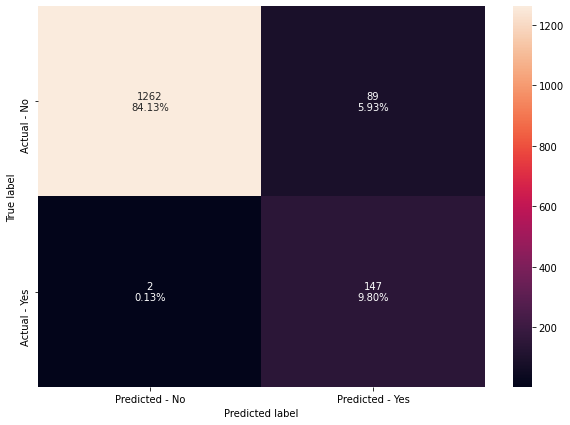

In [ ]:
make_confusion_matrix(best_model,y_test)

In [ ]:
get_recall_score(best_model)

Recall on training set :  0.9909365558912386
Recall on test set :  0.9865771812080537


## Visualizing the Decision Tree

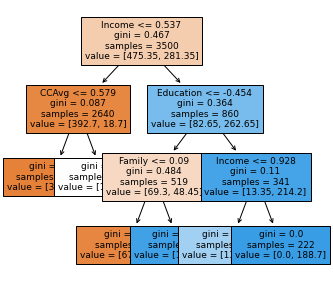

In [ ]:
plt.figure(figsize=(5,5))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.002 ccp_alpha**

In [ ]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

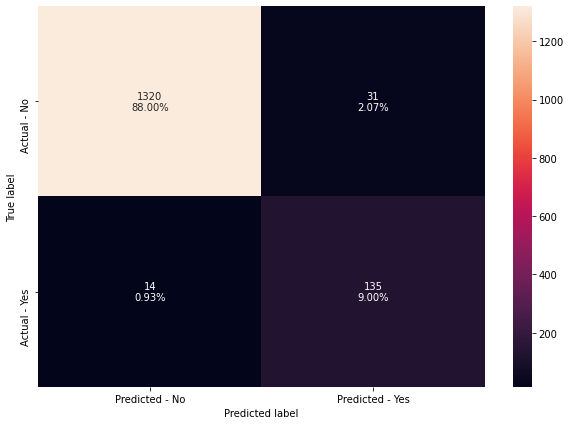

In [ ]:
make_confusion_matrix(best_model2,y_test)

* We are able to identify more True positives - customers that are actually going to contribute to buying loan than any other model.

In [ ]:
get_recall_score(best_model2)

Recall on training set :  0.9667673716012085
Recall on test set :  0.9060402684563759


* The results have improved from the initial model and we have got higher recall than the hyperparameter tuned model and generalized decision tree - having comparable performance on training and test set.

## Visualizing the Decision Tree

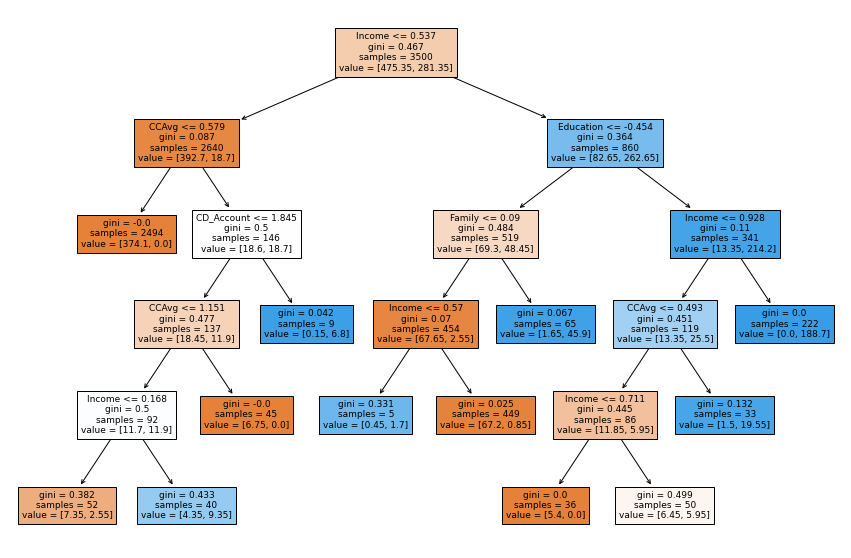

In [ ]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

|--- Income <= 0.54
|   |--- CCAvg <= 0.58
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  0.58
|   |   |--- CD_Account <= 1.85
|   |   |   |--- CCAvg <= 1.15
|   |   |   |   |--- Income <= 0.17
|   |   |   |   |   |--- weights: [7.35, 2.55] class: 0
|   |   |   |   |--- Income >  0.17
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  1.15
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  1.85
|   |   |   |--- weights: [0.15, 6.80] class: 1
|--- Income >  0.54
|   |--- Education <= -0.45
|   |   |--- Family <= 0.09
|   |   |   |--- Income <= 0.57
|   |   |   |   |--- weights: [0.45, 1.70] class: 1
|   |   |   |--- Income >  0.57
|   |   |   |   |--- weights: [67.20, 0.85] class: 0
|   |   |--- Family >  0.09
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  -0.45
|   |   |--- Income <= 0.93
|   |   |   |--- CCAvg <= 0.49
|   |   |   |   |--- Income <= 0.71
|   |   |   |   |   |--- weights:

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Income              0.626269
Family              0.148760
Education           0.132472
CCAvg               0.080678
CD_Account          0.011821
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
Facilities          0.000000


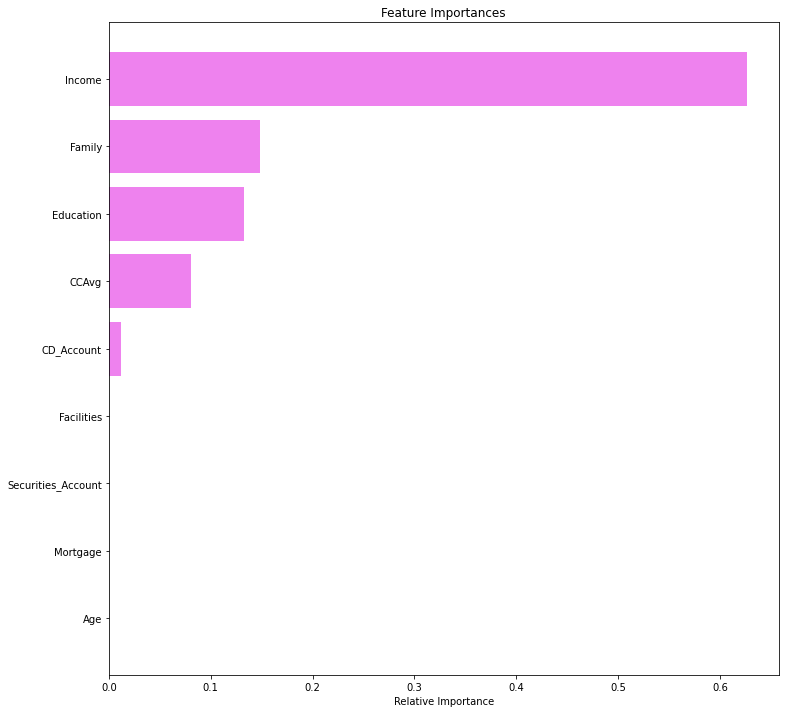

In [ ]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Income and Family duration are the top two important features to predict customer sessions contributing to buying loan.

## Comparing all the decision tree models

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.83,0.89], 'Test_Recall':[0.30,0.81,0.86]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.30
1,Decision treee with hyperparameter tuning,0.83,0.81
2,Decision tree with post-pruning,0.89,0.86


**Decision tree model with post pruning has given the best recall score on data.**

##**Logistic Regression**

In [ ]:
# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


In [ ]:
def get_metrics_score1(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
def get_metrics_score2(model,train,test,train_y,test_y,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
        
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train,y_train)

# Let's check model performances for this model
scores_LR = get_metrics_score2(model,X_train,X_test,y_train,y_test)

Accuracy on training set :  0.6765714285714286
Accuracy on test set :  0.6753333333333333
Recall on training set :  0.9879154078549849
Recall on test set :  0.9798657718120806
Precision on training set :  0.22474226804123712
Precision on test set :  0.23174603174603176
F1 on training set :  0.3661814109742441
F1 on test set :  0.37483953786906293


We have build a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.

We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

##**Logistic Regression (with statsmodels library)**

In [ ]:
y_train  = y_train.values.reshape(-1,1)

In [ ]:
import statsmodels.api as sm


# adding constant to training and test set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit = sm.Logit( y_train, X_train )

lg = logit.fit()

print(lg.summary2())

# Let's Look at Model Performance
y_pred = lg.predict(X_train) 
pred_train = list(map(round, y_pred))

y_pred1 = lg.predict(X_test) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.124971
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.601      
Dependent Variable:  y                AIC:              894.7994   
Date:                2021-06-04 16:31 BIC:              956.4046   
No. Observations:    3500             Log-Likelihood:   -437.40    
Df Model:            9                LL-Null:          -1095.5    
Df Residuals:        3490             LLR p-value:      1.0194e-277
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -4.8197   0.2036 -23.6683 0.0000 -5.2188 -4.4206
Age                 0.0599   0.0895   0.6

**Multicollinearity**

In [ ]:
vif_series1 = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 1.000271
Age                   1.009917
Income                1.866227
Family                1.031206
CCAvg                 1.734451
Education             1.047474
Mortgage              1.046015
Securities_Account    1.140526
CD_Account            1.338812
Facilities            1.135779
dtype: float64



In [ ]:
#Age has highest p values among those with p-value greater than 0.05
X_train1 = X_train.drop('Age', axis =1)
X_test1 = X_test.drop('Age',axis =1)

logit1 = sm.Logit(y_train, X_train1 )
lg1 = logit1.fit()
print(lg1.summary2())

# Let's Look at Model Performance
y_pred = lg1.predict(X_train1) 
pred_train = list(map(round, y_pred))

y_pred1 = lg1.predict(X_test1) 
pred_test = list(map(round, y_pred1))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.125035
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.601      
Dependent Variable:  y                AIC:              893.2480   
Date:                2021-06-04 16:31 BIC:              948.6927   
No. Observations:    3500             Log-Likelihood:   -437.62    
Df Model:            8                LL-Null:          -1095.5    
Df Residuals:        3491             LLR p-value:      9.6240e-279
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -4.8144   0.2031 -23.7000 0.0000 -5.2125 -4.4162
Income              2.4705   0.1456  16.9

Not much change in recall, let's drop Mortgrage now

In [ ]:
# Mortgage has highest p values among those with p-value greater than 0.05
X_train2 = X_train1.drop(['Mortgage'], axis =1)
X_test2 = X_test1.drop(['Mortgage'],axis =1)

logit2 = sm.Logit(y_train, X_train2 )
lg2 = logit2.fit()
print(lg2.summary2())

# Let's Look at Model Performance
y_pred = lg2.predict(X_train2) 
pred_train = list(map(round, y_pred))

y_pred1 = lg2.predict(X_test2) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.125233
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.600      
Dependent Variable:  y                AIC:              892.6324   
Date:                2021-06-04 16:31 BIC:              941.9166   
No. Observations:    3500             Log-Likelihood:   -438.32    
Df Model:            7                LL-Null:          -1095.5    
Df Residuals:        3492             LLR p-value:      1.3491e-279
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -4.8092   0.2025 -23.7474 0.0000 -5.2061 -4.4123
Income              2.4871   0.1450  17.1

no much change in recall

In [ ]:
# Education has highest p values among those with p-value greater than 0.05
X_train3 = X_train2.drop('Education', axis =1)
X_test3 = X_test2.drop('Education',axis =1)

logit3 = sm.Logit(y_train, X_train3 )
lg3 = logit3.fit()
print(lg3.summary2())

# Let's Look at Model Performance
y_pred = lg3.predict(X_train3) 
pred_train = list(map(round, y_pred))

y_pred1 = lg3.predict(X_test3) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.155375
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.504      
Dependent Variable:  y                AIC:              1101.6238  
Date:                2021-06-04 16:31 BIC:              1144.7474  
No. Observations:    3500             Log-Likelihood:   -543.81    
Df Model:            6                LL-Null:          -1095.5    
Df Residuals:        3493             LLR p-value:      4.0352e-235
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -4.0758   0.1529 -26.6480 0.0000 -4.3755 -3.7760
Income              1.9180   0.1113  17.2

Lets drop Facilities

In [ ]:
# Facilities has highest p values among those with p-value greater than 0.05
X_train4 = X_train3.drop('Facilities', axis =1)
X_test4 = X_test3.drop('Facilities',axis =1)

logit4 = sm.Logit(y_train, X_train4 )
lg4 = logit4.fit()
print(lg4.summary2())

# Let's Look at Model Performance
y_pred = lg4.predict(X_train4) 
pred_train = list(map(round, y_pred))

y_pred1 = lg4.predict(X_test4) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.160675
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.487      
Dependent Variable:  y                AIC:              1136.7273  
Date:                2021-06-04 16:31 BIC:              1173.6905  
No. Observations:    3500             Log-Likelihood:   -562.36    
Df Model:            5                LL-Null:          -1095.5    
Df Residuals:        3494             LLR p-value:      2.7972e-228
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -3.9619   0.1460 -27.1393 0.0000 -4.2480 -3.6758
Income              1.9129   0.1094  17.4

Lets drop Securities Account

In [ ]:
# Securities Account has highest p values among those with p-value greater than 0.05
X_train5 = X_train4.drop('Securities_Account', axis =1)
X_test5 = X_test4.drop('Securities_Account',axis =1)

logit5 = sm.Logit(y_train, X_train5)
lg5 = logit5.fit()
print(lg5.summary2())

# Let's Look at Model Performance
y_pred = lg5.predict(X_train5) 
pred_train = list(map(round, y_pred))

y_pred1 = lg5.predict(X_test5) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.161922
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.483      
Dependent Variable: y                AIC:              1143.4553  
Date:               2021-06-04 16:31 BIC:              1174.2579  
No. Observations:   3500             Log-Likelihood:   -566.73    
Df Model:           4                LL-Null:          -1095.5    
Df Residuals:       3495             LLR p-value:      1.2538e-227
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const         -3.9619    0.1459  -27.1519  0.0000  -4.2479  -3.6759
Income         1.9333    0.1089   17.7533  0.0000

recall on train is not improving much
So lg1 is the final model that we will use for predictions and inferences

**Let's use model 'lg1' for making interpretations**

*  As per lg4, Income,Family,CCAvg,Educaton,Mortgage are important variables here


**Check Model Performance**

In [ ]:
# Let's Look at Model Performance
y_pred = lg1.predict(X_train1) 
pred_train = list(map(round, y_pred))

y_pred1 = lg1.predict(X_test1) 
pred_test = list(map(round, y_pred1))

In [ ]:
#Model performance with 0.5 threshold

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.9525714285714286
Accuracy on test data: 0.9453333333333334
Recall on train data: 0.6465256797583081
Recall on test data: 0.5838926174496645
Precision on train data: 0.8136882129277566
Precision on test data: 0.8130841121495327
f1 score on train data: 0.7205387205387206
f1 score on test data: 0.6796875000000001


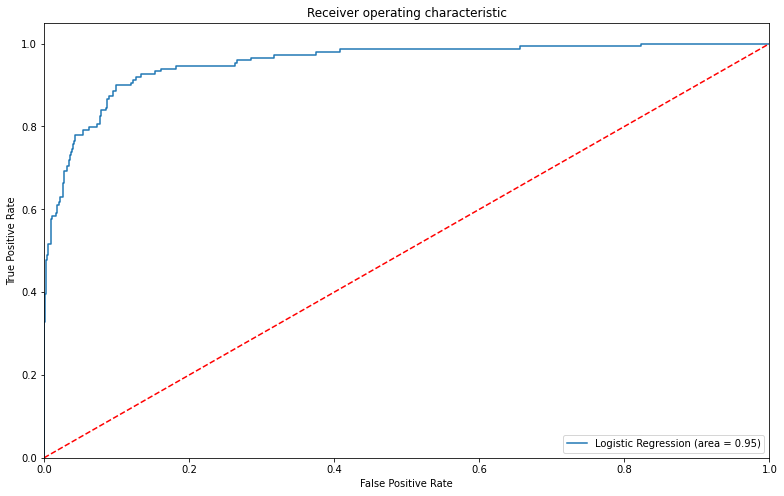

In [ ]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Try to improve Recall using AUC-ROC curve**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.08786780512302833


In [ ]:
# Model prediction with optimal threshold
pred_train_opt = (lg1.predict(X_train1)>optimal_threshold).astype(int)
pred_test_opt = (lg1.predict(X_test1)>optimal_threshold).astype(int)

In [ ]:
#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.8865714285714286
Accuracy on test data: 0.9
Recall on train data: 0.9003021148036254
Recall on test data: 0.8926174496644296
Precision on train data: 0.4501510574018127
Precision on test data: 0.49812734082397003
f1 score on train data: 0.6002014098690835
f1 score on test data: 0.6394230769230769


**Now Let's use Precision-Recall curve and see if we can find a better threshold**

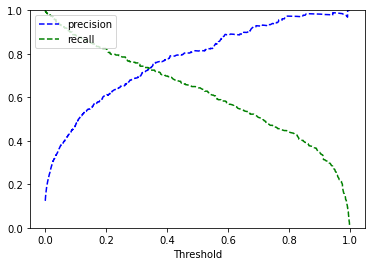

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores=lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores, )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* Decreasing threshold beyond 0.3 will lead to fast decrease in Precision, which will lead to great loss of opportunity, so let's consider threshold of 0.3

**Check Model Performance¶**

In [ ]:
optimal_threshold = 0.3

# Model prediction with optimal threshold
pred_train_opt = (lg1.predict(X_train1)>optimal_threshold).astype(int)
pred_test_opt = (lg1.predict(X_test1)>optimal_threshold).astype(int)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.9448571428571428
Accuracy on test data: 0.94
Recall on train data: 0.7583081570996979
Recall on test data: 0.7046979865771812
Precision on train data: 0.6895604395604396
Precision on test data: 0.695364238410596
f1 score on train data: 0.7223021582733814
f1 score on test data: 0.7


This model works better than previous one 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

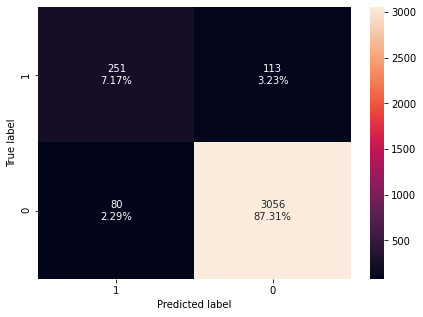

In [ ]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train_opt)

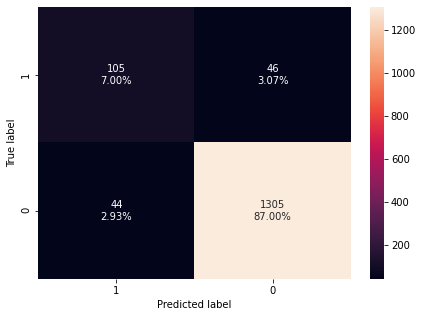

In [ ]:
# let us make confusion matrix on test set
make_confusion_matrix(y_test,pred_test_opt)

##**Conclusion and Recommendations**

* We analyzed the "Bank Personal Loan Modelling" using different techniques and used Decision Tree Classifier & logistic regression to build a predictive model for the same.

* The model built can be used to predict if a customer is going to contribute to buy a loan or not.

* We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.

* We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.

* We established the importance of hyper-parameters/ pruning to reduce overfitting in Decision Tree

* In logistic Regression, we achieved the best test recall in 94% but the test precision is quiet low i.e ~69% at the same time. This means that the model is not good at identifying customer liability customer buying personal loans, therefore, bank can lose many opportunities of giving loan to a customer.
* The model performance can be improved, especially in terms of precision and the bank can use use the model for new customers once desired level of model performance is achieved.
* Income has a good effect on Personal Loan Customers with High Income have more chances of having Personal Loan.
* We saw that customers who have Professional Background in a bank are interested in to buy a Loan
* Our analysis shows that it seems that customer who do not have personal loan and customer who has personal loan have high mortgage.

|Model Name|Train Precion|Train Recall|Test Precision| Test Reca| F1 Score 
|----|-------|---|----|----|---|
|1|2|3|4|5|6|
|2|3|4|4|5|6|

